In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [16]:
df = pd.read_csv("Road.csv")

In [18]:
df1 = df[['Age_band_of_driver','Sex_of_driver','Area_accident_occured','Road_surface_conditions','Light_conditions','Weather_conditions','Accident_severity']]

In [20]:
df1.isna().sum()

Age_band_of_driver           0
Sex_of_driver                0
Area_accident_occured      239
Road_surface_conditions      0
Light_conditions             0
Weather_conditions           0
Accident_severity            0
dtype: int64

In [22]:
df1.dropna(inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18540\3614008390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [24]:
df1.isna().sum()

Age_band_of_driver         0
Sex_of_driver              0
Area_accident_occured      0
Road_surface_conditions    0
Light_conditions           0
Weather_conditions         0
Accident_severity          0
dtype: int64

In [26]:
df1.shape

(12077, 7)

In [28]:
valueCounts = []
valueCounts.append(df1['Age_band_of_driver'].unique())
valueCounts.append(df1['Sex_of_driver'].unique())
valueCounts.append(df1['Area_accident_occured'].unique())
valueCounts.append(df1['Road_surface_conditions'].unique())
valueCounts.append(df1['Light_conditions'].unique())
valueCounts.append(df1['Weather_conditions'].unique())
valueCounts.append(df1['Accident_severity'].unique())

In [30]:
for i in range(len(valueCounts)):
    print(valueCounts[i])

['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
['Male' 'Female' 'Unknown']
['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' 'Other' ' Church areas' '  Market areas' 'Unknown'
 'Rural village areas' ' Outside rural areas' ' Hospital areas'
 'School areas' 'Rural village areasOffice areas' 'Recreational areas']
['Dry' 'Wet or damp' 'Snow' 'Flood over 3cm. deep']
['Daylight' 'Darkness - lights lit' 'Darkness - no lighting'
 'Darkness - lights unlit']
['Normal' 'Raining' 'Raining and Windy' 'Cloudy' 'Other' 'Windy' 'Snow'
 'Unknown' 'Fog or mist']
['Slight Injury' 'Serious Injury' 'Fatal injury']


In [32]:
df2 = df1.replace('Unknown', np.nan)

df2.isna().sum()

In [35]:
df2.dropna(inplace=True)

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()

In [39]:
df1 = df1.rename(columns={'Age_band_of_driver':'Age','Sex_of_driver':'Gender','Area_accident_occured':'Area','Road_surface_conditions':'Road_Condition','Light_conditions':'Light_Condition','Weather_conditions':'Weather_Condition','Accident_severity':'Severity'})

In [41]:
df1.head()

,Age,Gender,Area,Road_Condition,Light_Condition,Weather_Condition,Severity
0,18-30,Male,Residential areas,Dry,Daylight,Normal,Slight Injury
1,31-50,Male,Office areas,Dry,Daylight,Normal,Slight Injury
2,18-30,Male,Recreational areas,Dry,Daylight,Normal,Serious Injury
3,18-30,Male,Office areas,Dry,Darkness - lights lit,Normal,Slight Injury
4,18-30,Male,Industrial areas,Dry,Darkness - lights lit,Normal,Slight Injury


In [43]:
df1['Area'] = df1['Area'].str.strip()

In [45]:
print(df1['Area'].unique())

['Residential areas' 'Office areas' 'Recreational areas'
 'Industrial areas' 'Other' 'Church areas' 'Market areas' 'Unknown'
 'Rural village areas' 'Outside rural areas' 'Hospital areas'
 'School areas' 'Rural village areasOffice areas']


In [47]:
df1['Area'] = df1['Area'].replace('Rural village areasOffice areas','Rural village areas')

In [49]:
print(df1['Area'].unique())

['Residential areas' 'Office areas' 'Recreational areas'
 'Industrial areas' 'Other' 'Church areas' 'Market areas' 'Unknown'
 'Rural village areas' 'Outside rural areas' 'Hospital areas'
 'School areas']


In [51]:
df1.head()

,Age,Gender,Area,Road_Condition,Light_Condition,Weather_Condition,Severity
0,18-30,Male,Residential areas,Dry,Daylight,Normal,Slight Injury
1,31-50,Male,Office areas,Dry,Daylight,Normal,Slight Injury
2,18-30,Male,Recreational areas,Dry,Daylight,Normal,Serious Injury
3,18-30,Male,Office areas,Dry,Darkness - lights lit,Normal,Slight Injury
4,18-30,Male,Industrial areas,Dry,Darkness - lights lit,Normal,Slight Injury


In [53]:
urban_areas = ['Recreational areas', 'Church areas', 'Office areas', 'Market areas', 'Hospital areas', 'School areas']
rural_areas = ['Rural village areas', 'Outside rural areas']

df1['Area'] = df1['Area'].replace(urban_areas, 'Urban areas')
df1['Area'] = df1['Area'].replace(rural_areas, 'Rural areas')

# Combine weather conditions
raining_windy = ['Raining', 'Raining and Windy', 'Windy', 'Snow']
df1['Weather_Condition'] = df1['Weather_Condition'].replace(raining_windy, 'Raining and Windy')
df1['Weather_Condition'] = df1['Weather_Condition'].replace(['Cloudy', 'Normal'], 'Normal')

# Combine light conditions
night_time = ['Darkness - lights lit', 'Darkness - no lighting', 'Darkness - lights unlit']
df1['Light_Condition'] = df1['Light_Condition'].replace(night_time, 'Night time')

# Combine road conditions
wet_conditions = ['Wet or damp', 'Snow', 'Flood over 3cm. deep']
df1['Road_Condition'] = df1['Road_Condition'].replace(wet_conditions, 'Wet')

print(df1)

           Age  Gender               Area Road_Condition Light_Condition  \
0        18-30    Male  Residential areas            Dry        Daylight   
1        31-50    Male        Urban areas            Dry        Daylight   
2        18-30    Male        Urban areas            Dry        Daylight   
3        18-30    Male        Urban areas            Dry      Night time   
4        18-30    Male   Industrial areas            Dry      Night time   
...        ...     ...                ...            ...             ...   
12311    31-50    Male        Rural areas            Dry        Daylight   
12312  Unknown    Male        Rural areas            Dry        Daylight   
12313  Over 51    Male        Rural areas            Dry        Daylight   
12314    18-30  Female        Urban areas            Dry      Night time   
12315    18-30    Male        Rural areas            Dry      Night time   

      Weather_Condition        Severity  
0                Normal   Slight Injury  
1  

In [55]:
df1.head()

,Age,Gender,Area,Road_Condition,Light_Condition,Weather_Condition,Severity
0,18-30,Male,Residential areas,Dry,Daylight,Normal,Slight Injury
1,31-50,Male,Urban areas,Dry,Daylight,Normal,Slight Injury
2,18-30,Male,Urban areas,Dry,Daylight,Normal,Serious Injury
3,18-30,Male,Urban areas,Dry,Night time,Normal,Slight Injury
4,18-30,Male,Industrial areas,Dry,Night time,Normal,Slight Injury


In [57]:
print(df1['Age'].unique())

['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']


In [244]:

age_categories = ['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown']
age_dfs = {}


for age in age_categories:
    age_dfs[age] = df1[df1['Age'] == age]
    file_name = f"data_{age.replace(' ', '_').replace('-', '_')}.csv"
    age_dfs[age].to_csv(file_name, index=False)

print("CSV files saved for each age category:")
print(list(age_dfs.keys()))

CSV files saved for each age category:
['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown']


In [59]:
df2 = pd.read_csv("data_Over_51.csv")

In [61]:
#Ordinal Encoder
df2['Age'] = ordinal_encoder.fit_transform(df2[['Age']])
df2['Road_Condition'] = ordinal_encoder.fit_transform(df2[['Road_Condition']])
df2['Light_Condition'] = ordinal_encoder.fit_transform(df2[['Light_Condition']])
df2['Severity'] = ordinal_encoder.fit_transform(df2[['Severity']])

In [63]:
#Label Encoder
df2['Gender'] = label_encoder.fit_transform(df2['Gender'])
df2['Weather_Condition'] = label_encoder.fit_transform(df2['Weather_Condition'])

In [65]:
#One Hot Encoding
dummies = pd.get_dummies(df2.Area)
dummies = dummies.astype(int)
dummies

,Industrial areas,Other,Residential areas,Rural areas,Unknown,Urban areas
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
1547,0,1,0,0,0,0
1548,0,0,1,0,0,0
1549,0,1,0,0,0,0
1550,0,1,0,0,0,0


In [67]:
df2 = pd.concat([df2, dummies], axis='columns')
df2.head(3)

,Age,Gender,Area,Road_Condition,Light_Condition,Weather_Condition,Severity,Industrial areas,Other,Residential areas,Rural areas,Unknown,Urban areas
0,0.0,2,Unknown,0.0,0.0,1,2.0,0,0,0,0,1,0
1,0.0,1,Rural areas,0.0,0.0,1,2.0,0,0,0,1,0,0
2,0.0,1,Residential areas,0.0,1.0,1,2.0,0,0,1,0,0,0


In [69]:
df2.drop(['Area'],axis=1, inplace=True)

In [71]:
df2.drop(['Age'],axis=1, inplace=True)

In [73]:
df2.drop(['Gender'],axis=1, inplace=True)

In [75]:
df2.head()

,Road_Condition,Light_Condition,Weather_Condition,Severity,Industrial areas,Other,Residential areas,Rural areas,Unknown,Urban areas
0,0.0,0.0,1,2.0,0,0,0,0,1,0
1,0.0,0.0,1,2.0,0,0,0,1,0,0
2,0.0,1.0,1,2.0,0,0,1,0,0,0
3,0.0,1.0,1,2.0,0,0,1,0,0,0
4,0.0,0.0,1,2.0,0,0,0,1,0,0


In [77]:
df2.to_csv('Over_51Processed.csv', index=False, encoding='utf-8')

In [79]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from mlxtend.frequent_patterns import apriori, association_rules

Decision Tree Classification Report:
              precision    recall  f1-score   support

      Slight       0.00      0.00      0.00         5
     Serious       0.00      0.00      0.00        76
       Fatal       0.83      1.00      0.90       385

    accuracy                           0.83       466
   macro avg       0.28      0.33      0.30       466
weighted avg       0.68      0.83      0.75       466


Decision Tree Rules:
|--- Other <= 0.50
|   |--- Residential areas <= 0.50
|   |   |--- Rural areas <= 0.50
|   |   |   |--- Road_Condition <= 0.50
|   |   |   |   |--- Urban areas <= 0.50
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- Urban areas >  0.50
|   |   |   |   |   |--- class: 2.0
|   |   |   |--- Road_Condition >  0.50
|   |   |   |   |--- Light_Condition <= 0.50
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- Light_Condition >  0.50
|   |   |   |   |   |--- class: 2.0
|   |   |--- Rural areas >  0.50
|   |   |   |--- Road_Condition <= 0.50
|   

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


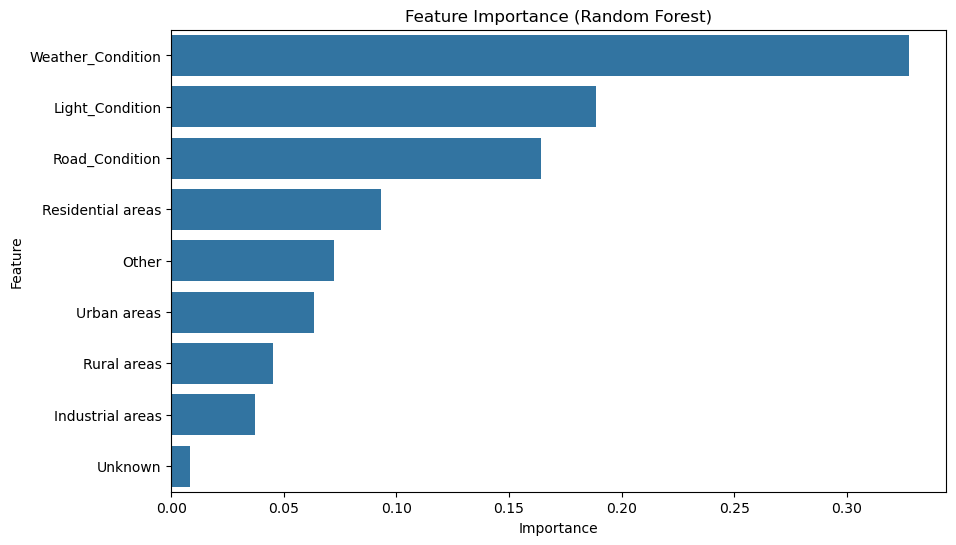


Serious Severity Rules:
|--- class: 0


Slight Severity Rules:
|--- class: 0


Association Rules for Serious Severity:
                                          antecedents  \
26            (Residential areas, Road_Condition_Dry)   
56  (Residential areas, Light_Condition_Daylight, ...   
54  (Residential areas, Light_Condition_Daylight, ...   
34                  (Road_Condition_Dry, Urban areas)   
46        (Road_Condition_Dry, Light_Condition_Night)   
..                                                ...   
57            (Residential areas, Road_Condition_Dry)   
11                            (Light_Condition_Night)   
65                                      (Urban areas)   
30      (Residential areas, Weather_Condition_Normal)   
4                                 (Residential areas)   

                                          consequents  antecedent support  \
26                         (Weather_Condition_Normal)            0.157480   
56                               (Road_Co

C:\ProgramData\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [81]:

data = pd.read_csv('Over_51Processed.csv')


light_condition_mapping = {0.0: 'Daylight', 1.0: 'Night'}
weather_condition_mapping = {
    0.0: 'Fog or Mist', 1.0: 'Normal', 2.0: 'Other',
    3.0: 'Raining and windy', 4.0: 'Unknown'
}
road_condition_mapping = {0.0: 'Dry', 1.0: 'Wet'}
severity_mapping = {2.0: 'Slight', 1.0: 'Serious', 0.0: 'Fatal'}


X = data.drop(columns=['Severity'])
y = data['Severity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier for interpretability
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Classification report for Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=severity_mapping.values()))

# Extract decision rules
dt_rules = export_text(dt, feature_names=list(X.columns))
print("\nDecision Tree Rules:")
print(dt_rules)

# Random Forest Classifier for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance plot
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()

# Serious and Slight severity filtering
serious_indices = y_train[y_train == 1.0].index
slight_indices = y_train[y_train == 2.0].index

X_serious = X_train.loc[serious_indices]
X_slight = X_train.loc[slight_indices]

#  separate Decision Trees for Serious and Slight
dt_serious = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_serious.fit(X_serious, y_train.loc[serious_indices])
dt_slight = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_slight.fit(X_slight, y_train.loc[slight_indices])

# Extract rules for each severity level
serious_rules = export_text(dt_serious, feature_names=list(X.columns))
slight_rules = export_text(dt_slight, feature_names=list(X.columns))

print("\nSerious Severity Rules:")
print(serious_rules)

print("\nSlight Severity Rules:")
print(slight_rules)



def one_hot_encode(df, mappings):
    encoded = df.copy()
    for col, mapping in mappings.items():
        if col in encoded.columns:
            encoded[col] = encoded[col].map(mapping)
    return pd.get_dummies(encoded)

# One-hot encode for association rule mining
one_hot_data = one_hot_encode(X, {
    'Road_Condition': road_condition_mapping,
    'Light_Condition': light_condition_mapping,
    'Weather_Condition': weather_condition_mapping
})


df_serious = one_hot_data[y == 1.0]
apriori_results = apriori(df_serious, min_support=0.1, use_colnames=True)
rules = association_rules(apriori_results, metric="confidence", num_itemsets=apriori_results, min_threshold=0.6)

print("\nAssociation Rules for Serious Severity:")
print(rules.sort_values(by='confidence', ascending=False))




C:\Users\Administrator\AppData\Local\Temp\ipykernel_18540\2402791052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_mapped, palette="gray")


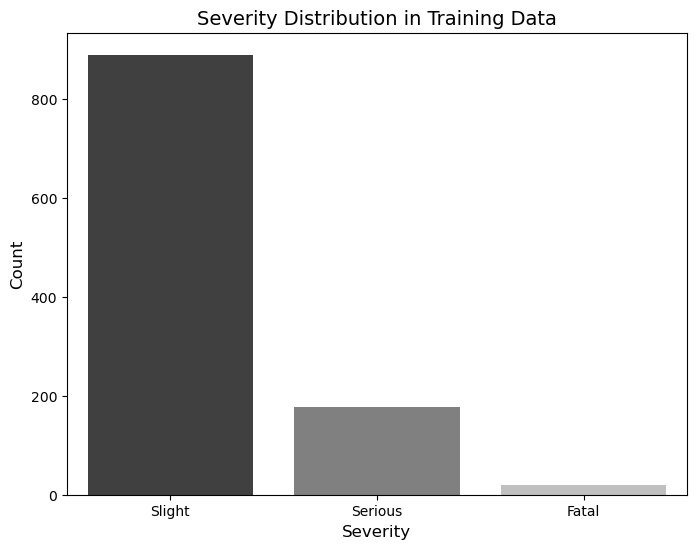

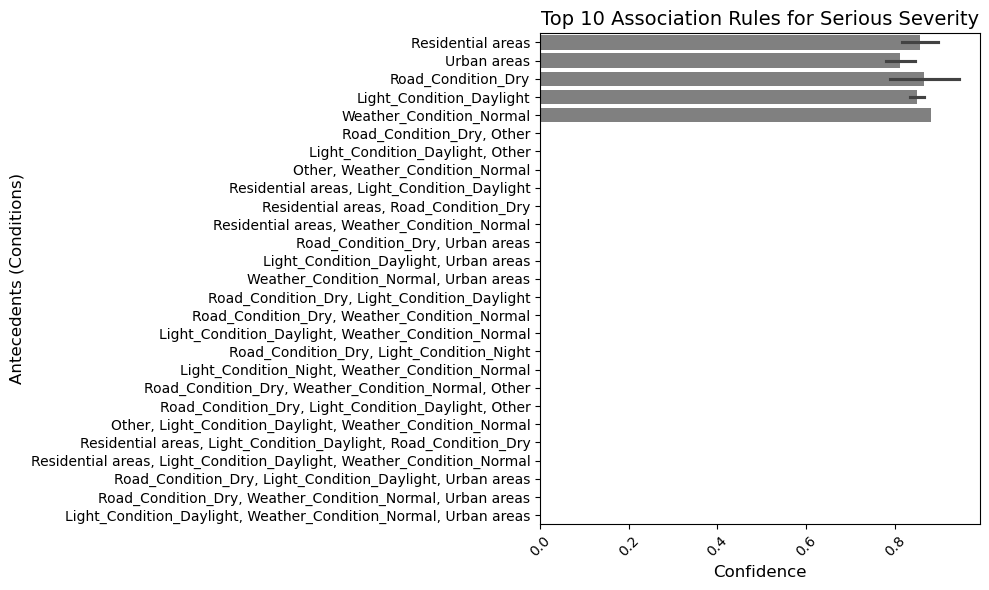

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18540\2402791052.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


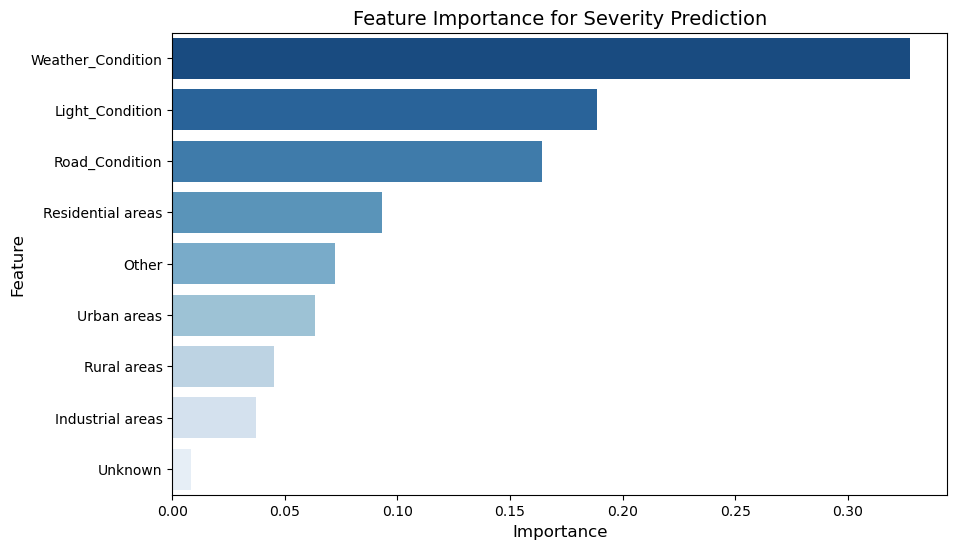

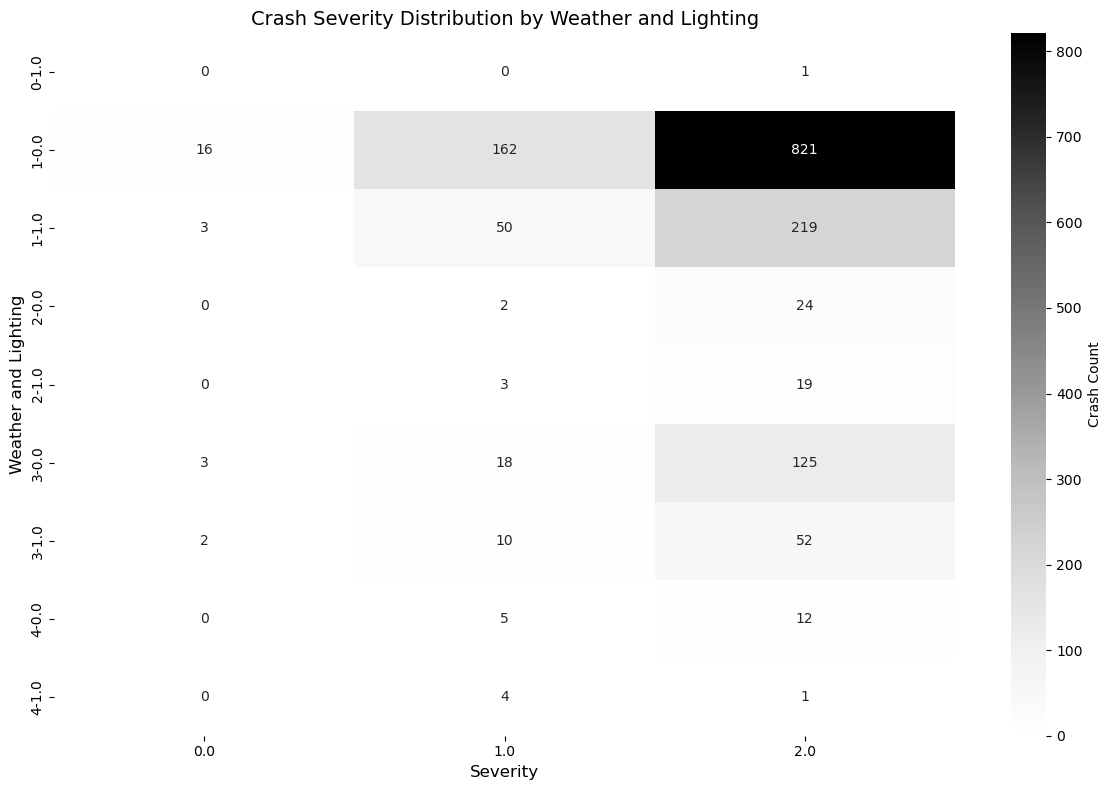

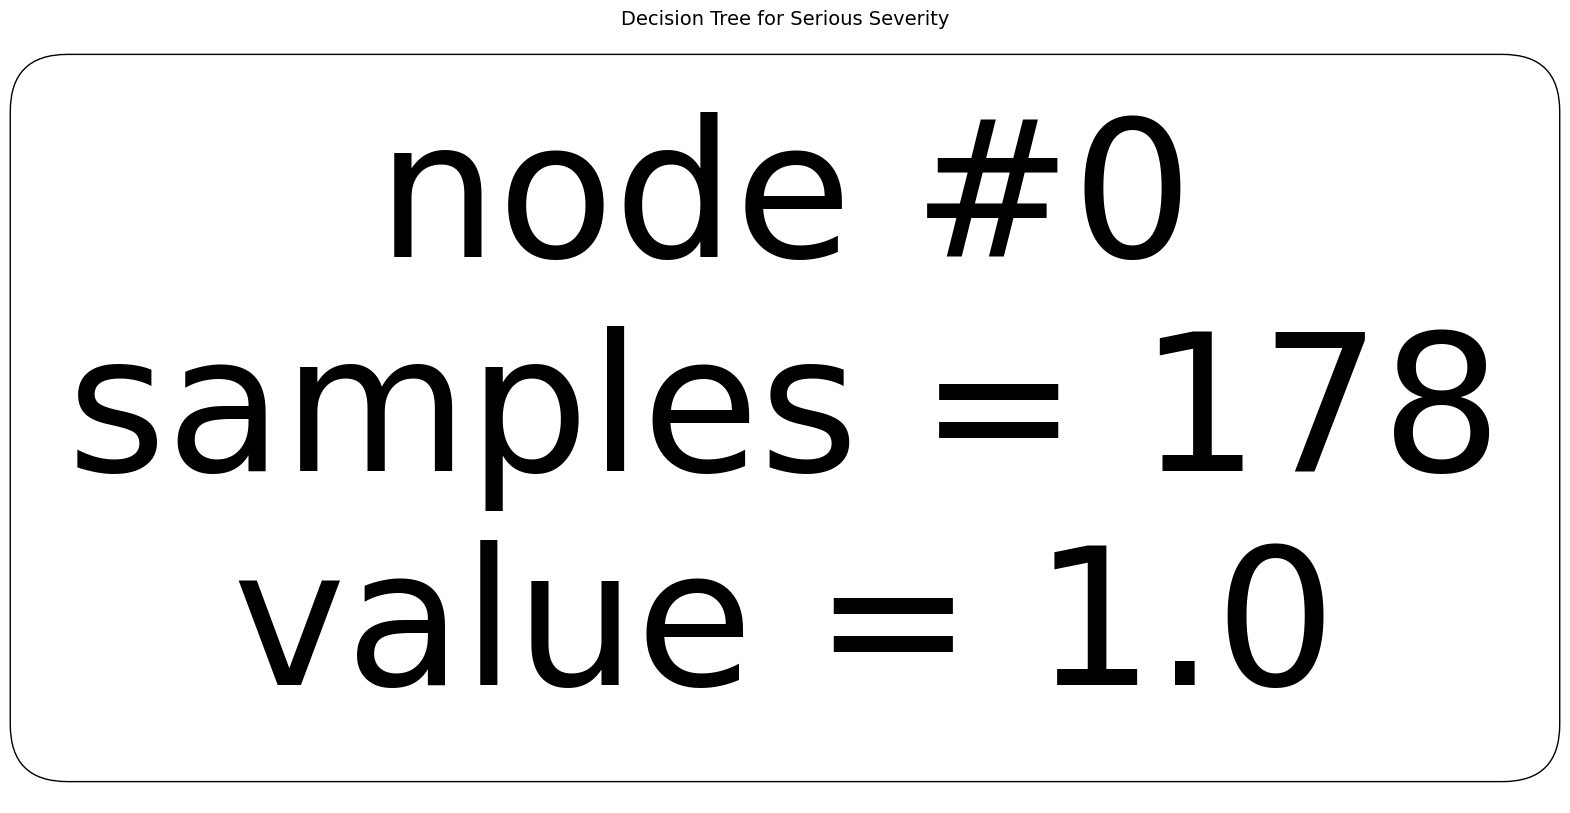

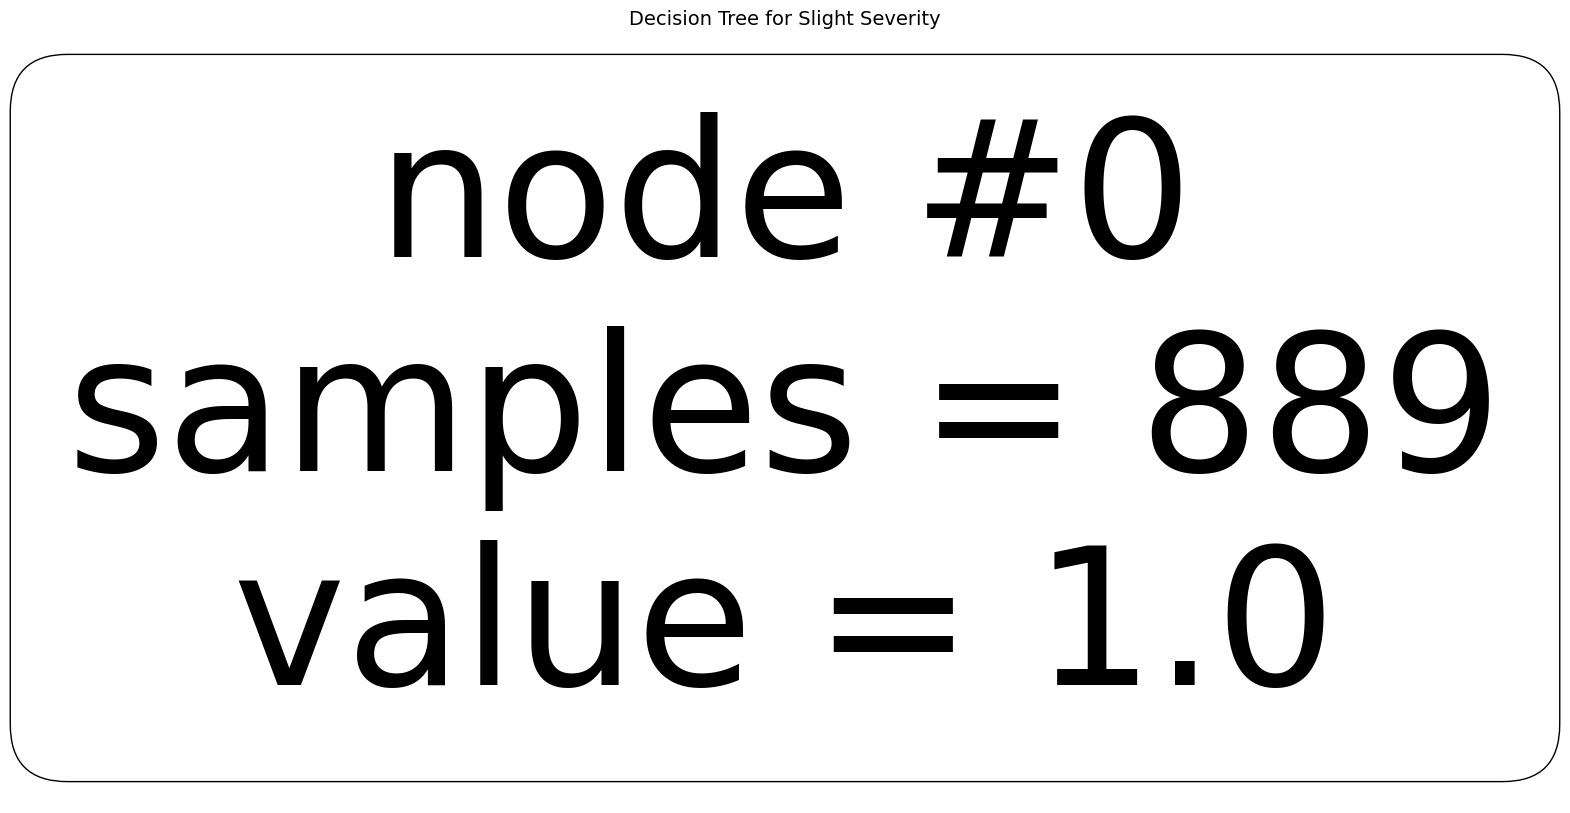

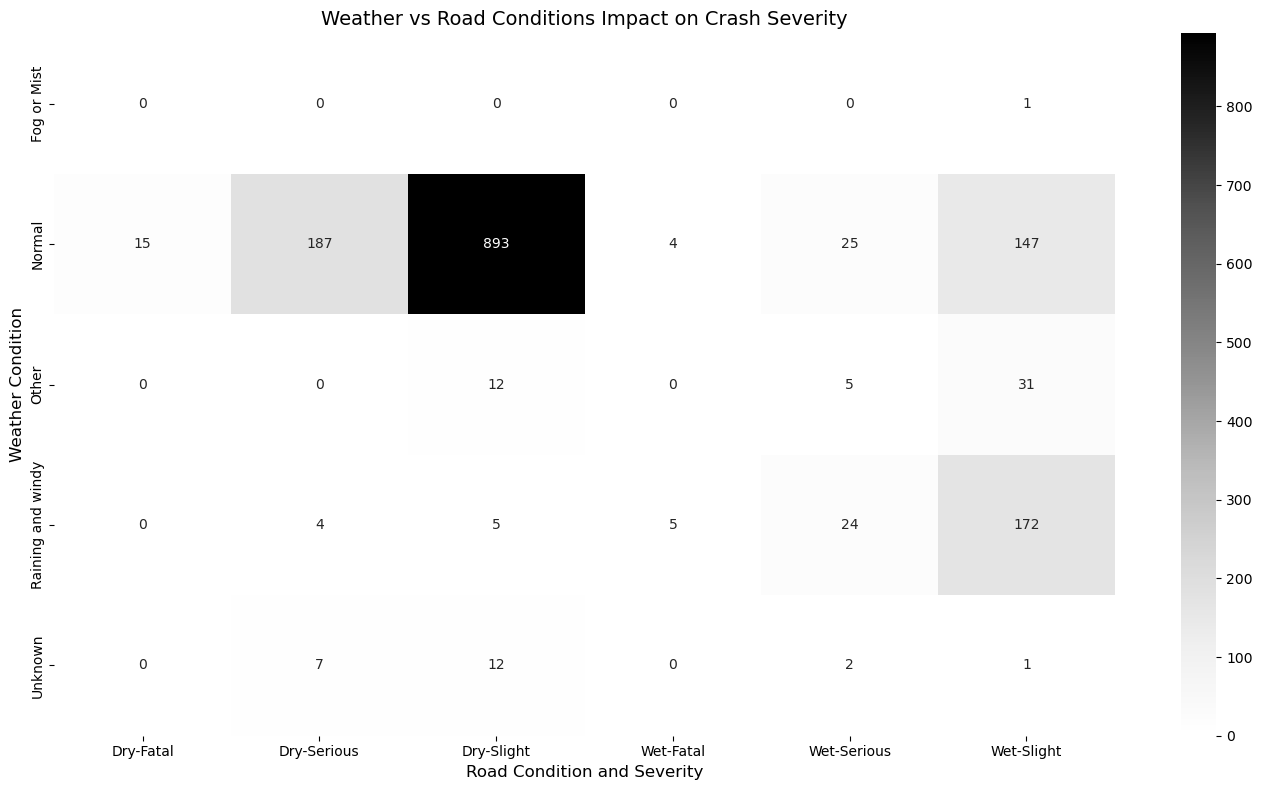

In [85]:
y_train_mapped = y_train.map(severity_mapping)
y_test_mapped = y_test.map(severity_mapping)

# 1. Visualization: Severity Distribution for Training Data
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_mapped, palette="gray")
plt.title('Severity Distribution in Training Data', fontsize=14)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 2. Visualization: Rules Derived for Serious and Slight Crashes
# Focus on the association rules derived for Serious cases
serious_rules_filtered = rules[(rules['confidence'] > 0.6) & (rules['lift'] > 1.0)]

#  top rules for serious crashes
plt.figure(figsize=(10, 6))
sns.barplot(
    data=serious_rules_filtered.head(10),
    x='confidence',
    y=serious_rules_filtered['antecedents'].apply(lambda x: ', '.join(list(x))),
    color='gray'
)
plt.title('Top 10 Association Rules for Serious Severity', fontsize=14)
plt.xlabel('Confidence', fontsize=12)
plt.ylabel('Antecedents (Conditions)', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 3. Visualization: Feature Importance for Both Serious and Slight Crashes
# Using the feature importance from the Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df,
    x='Importance',
    y='Feature',
    palette="Blues_r"
)
plt.title('Feature Importance for Severity Prediction', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 4. Heatmap: Distribution of Slight and Serious Crashes by Weather and Lighting
weather_lighting_data = data.groupby(['Weather_Condition', 'Light_Condition', 'Severity']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(
    weather_lighting_data,
    annot=True,
    fmt='d',
    cmap='Greys',
    cbar_kws={'label': 'Crash Count'}
)
plt.title('Crash Severity Distribution by Weather and Lighting', fontsize=14)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Weather and Lighting', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 5. Tree Visualization for Decision Rules
# For interpretability, visualize the decision trees for Serious and Slight severity
plt.figure(figsize=(20, 10))
plot_tree(
    dt_serious,
    feature_names=X.columns,
    class_names=['Non-Serious', 'Serious'],
    filled=True,
    rounded=True,
    node_ids=True,
    impurity=False
)
plt.title('Decision Tree for Serious Severity', fontsize=14)
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(
    dt_slight,
    feature_names=X.columns,
    class_names=['Non-Slight', 'Slight'],
    filled=True,
    rounded=True,
    node_ids=True,
    impurity=False
)
plt.title('Decision Tree for Slight Severity', fontsize=14)
plt.show()


combined_counts = data.groupby(['Weather_Condition', 'Road_Condition', 'Severity']).size().reset_index(name='Count')
combined_counts['Weather_Condition'] = combined_counts['Weather_Condition'].map(weather_condition_mapping)
combined_counts['Road_Condition'] = combined_counts['Road_Condition'].map(road_condition_mapping)
combined_counts['Severity'] = combined_counts['Severity'].map(severity_mapping)

plt.figure(figsize=(14, 8))
sns.heatmap(
    combined_counts.pivot_table(
        index=['Weather_Condition'],
        columns=['Road_Condition', 'Severity'],
        values='Count',
        aggfunc='sum',
        fill_value=0
    ),
    cmap='Greys', annot=True, fmt='d'
)
plt.title('Weather vs Road Conditions Impact on Crash Severity', fontsize=14)
plt.ylabel('Weather Condition', fontsize=12)
plt.xlabel('Road Condition and Severity', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
